## 피마인디언의 당뇨병 예측

### 데이터 파일 업로드

In [1]:
import numpy as np 
import pandas as pd 
from google.colab import files

uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [2]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 판다스를 이용한 데이터프레임

In [19]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 데이터 전처리와 훈련/데이터 셋 나누기

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-1].values)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df[8].values, stratify=df[8].values, random_state=2021
)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential([
    Dense(12, input_shape=(8, ), activation='relu'),   #첫번째 은닉층
    Dense(8, activation='relu'),                       #두번째 은닉층
    Dense(1, activation='sigmoid')                     #출력층
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)

Epoch 1/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7457 - val_loss: 0.5088 - val_accuracy: 0.7414
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7543 - val_loss: 0.5036 - val_accuracy: 0.7414
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7543 - val_loss: 0.4963 - val_accuracy: 0.7414
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7652 - val_loss: 0.4945 - val_accuracy: 0.7414
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7696 - val_loss: 0.4962 - val_accuracy: 0.7414
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7630 - val_loss: 0.4935 - val_accuracy: 0.7328
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7674 - val_loss: 0.4939 - val_accuracy: 0.7328
Epoch 8/30
46/46 [==

In [18]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8021
정확도: 0.8021


## 학습과정 시각화

In [21]:
type(history.history)

dict

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 검증셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 정확도
y_acc = history.history['accuracy']

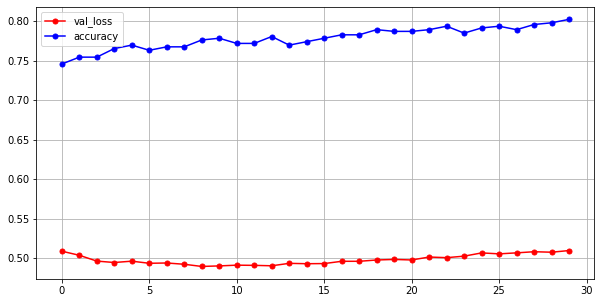

In [29]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, 'or-', markersize=5, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=5, label='accuracy')
plt.legend()
plt.grid()
plt.show()

### 모델의 저장 및  재사용

In [30]:
# 모델저장
model.save('model.h5')

In [31]:
# 모델 불러오기(로드)
from tensorflow.keras.models import load_model
new_model = load_model ('model.h5')

In [32]:
acc = new_model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8021
정확도: 0.8021
